Compare Condensability score and C-half

In [1]:
# python modules
import sys
import copy
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
# 4-parameter logistic function (sigmoid type)
def sigmoid_func (x, top, rate, chalf, bottom):
    y = bottom + float(top-bottom)/(1+np.exp(rate*(x-chalf)))
    return y

# 4-parameter logistic function (Hill type)
def hill_func (x, top, rate, chalf, bottom):
    y = bottom + float(top-bottom)/(1.0 + (x/float(chalf))**rate)
    return y

# compute the CP value of logistic function
def get_CP (rate, chalf, percent, model='sigmoid'):
    surv_frac = 1 - percent/100.0
    ratio = float(1.0 - surv_frac)/surv_frac
    if model == 'sigmoid':
        CP = np.log(ratio)/float(rate) + chalf
    elif model == 'hill':
        CP = ((ratio)**(1.0/rate)) * chalf
    return CP

In [5]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

In [6]:
agent_fullname = {'sp':'Spermine(4+)',
                  'spd':'Spermidine(3+)',
                  'CoH':'Cobalt Hexammine(3+)',
                  'PEG':'PEG 8000',
                  'HP1a':'HP1$\\alpha$',
                  'HP1bSUV':'HP1$\\beta$+tSUV',
                  'LKH':'Linker histone1',
                  'Ki67':'Ki67',
                  'FUS':'FUS',
                  'Mg':'Magnesium',
                  'Ca':'Calcium'}

In [7]:
### load gtab file
gtab_path = "/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/"

gtab_fname1 = 'mCD8T:WT_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz'
gtab_fname2 = 'mCD8T:DFMO_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz'
gtab_fname3 = 'mCD8T:ODCKO_NCP_sp_1rep_10kb_sigmoid_4PL.gtab.gz'

field_choices = ['Top', 'Rate', 'C-half', 'Bottom', 'R-squared']
chr_choices = ['chr1']

ID_field_value1 = load_file.read_gtab (gtab_path + gtab_fname1,
                                       field_choices=field_choices,
                                       chr_choices=chr_choices,
                                       skip_nan=True)
ID_field_value2 = load_file.read_gtab (gtab_path + gtab_fname2,
                                       field_choices=field_choices,
                                       chr_choices=chr_choices,
                                       skip_nan=True)
ID_field_value3 = load_file.read_gtab (gtab_path + gtab_fname3,
                                       field_choices=field_choices,
                                       chr_choices=chr_choices,
                                       skip_nan=True)


In [8]:
### read titration file
titr_path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/titration_files/'
titr_fname = 'mCD8T:WT_NCP_sp_titration.csv'
tnum_conc, tnum_frac = load_file.read_titration (titr_path + titr_fname)

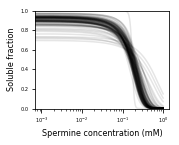

In [12]:
X_min, X_max = min(tnum_conc.values()), max(tnum_conc.values())
X = np.linspace(X_min, X_max, num=1000)
fig = plt.figure(figsize=(2.4, 1.8))
for ID in ID_field_value1.keys()[:100]:
    top = ID_field_value1[ID]['Top']
    rate = ID_field_value1[ID]['Rate']
    Chalf = ID_field_value1[ID]['C-half']
    bottom = ID_field_value1[ID]['Bottom']
    r_squared = ID_field_value1[ID]['R-squared']
    Y = sigmoid_func (X, top, rate, Chalf, bottom)
    plt.plot(X, Y, 'k-', alpha=0.1)
plt.xscale('log', basex=10)
plt.ylim([0, 1])
plt.xlabel("Spermine concentration (mM)", fontsize=8)
plt.ylabel("Soluble fraction", fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.tick_params(axis='both', which='minor', labelsize=5)
#plt.savefig("smoothed_10kb_curve.png", dpi=500, bbox_inches='tight')
plt.show()
plt.close()    